In [0]:
!git clone https://gitlab.com/rohitgade/afcars.git

Cloning into 'afcars'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 104 (delta 21), reused 79 (delta 11)
Receiving objects: 100% (104/104), 266.87 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Reading Data

### Filldata:
The csv file is a converted version of the same afcars dataset but only change is that its catogorical values are replaced.


In [0]:
file = "/content/drive/My Drive/Colab Notebooks/Data/filldata.csv"

In [4]:
import pandas as pa
# import mathpolot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
data = pa.read_csv(file,encoding='ISO-8859-1')
data.rename(columns={'Unnamed: 0':'index'}, inplace=True)
data.columns

Index(['index', 'FY', 'Version', 'STATE', 'St', 'REPDATYR', 'REPDATMO',
       'FIPSCode', 'SEX', 'AMIAKN', 'ASIAN', 'BLKAFRAM', 'HAWAIIPI', 'WHITE',
       'UNTODETM', 'HISORGIN', 'CLINDIS', 'MR', 'VISHEAR', 'PHYDIS',
       'EmotDist', 'OTHERMED', 'EVERADPT', 'AGEADOPT', 'TOTALREM', 'NUMPLEP',
       'MANREM', 'PHYABUSE', 'SEXABUSE', 'NEGLECT', 'AAPARENT', 'DAPARENT',
       'AACHILD', 'DACHILD', 'CHILDIS', 'CHBEHPRB', 'PRTSDIED', 'PRTSJAIL',
       'NOCOPE', 'ABANDMNT', 'RELINQSH', 'HOUSING', 'CURPLSET', 'PLACEOUT',
       'CASEGOAL', 'CTKFAMST', 'CTK1YR', 'FOSFAMST', 'FCCTK1YR', 'RF1AMAKN',
       'RF1ASIAN', 'RF1BLKAA', 'RF1NHOPI', 'RF1WHITE', 'RF1UTOD', 'HOFCCTK1',
       'HOFCCTK2', 'DISREASN', 'IVEFC', 'IVEAA', 'IVAAFDC', 'IVDCHSUP',
       'XIXMEDCD', 'SSIOTHER', 'NOA', 'FCMntPay', 'DOB', 'PedRevDt', 'Rem1Dt',
       'RemTrnDt', 'DLstFCDt', 'LatRemDt', 'CurSetDt', 'DoDFCDt', 'DoDTrnDt',
       'TPRMomDt', 'TPRDadDt', 'TPRDate', 'LatRemLOS', 'SettingLOS', 'LifeLOS',
       'Age

In [6]:
data.shape

(691188, 95)

In [0]:
cl = data.columns
predict = cl[27:42]
predict = predict.tolist()

## Col. that should predict

In [0]:
predict

['PHYABUSE',
 'SEXABUSE',
 'NEGLECT',
 'AAPARENT',
 'DAPARENT',
 'AACHILD',
 'DACHILD',
 'CHILDIS',
 'CHBEHPRB',
 'PRTSDIED',
 'PRTSJAIL',
 'NOCOPE',
 'ABANDMNT',
 'RELINQSH',
 'HOUSING']

In [0]:


# setting everthing else to 0
# data[predict]

## Dublicating date which has more than 1 reason for removle.

In [0]:
df = data[data['PHYABUSE']==1.0].copy()
df[predict[1:]] = df[predict[1:]].replace({1.0:0})

for i,c in enumerate(predict[1:]):
  temp = data[data[c]==1.0].copy()
  temp[predict[:i]+predict[i+1:]] = temp[predict[:i]+predict[i+1:]].replace({1.0:0})
  pa.concat([df,temp])

d = data[data[predict[0]]==1.0].copy()
d['reason'] = predict[0]
d = d.drop(predict,axis=1)

for i in range(1,15):
  temp = data[data[predict[i]]==1.0].copy()
  temp['reason'] = predict[i]
  temp = temp.drop(predict,axis=1)
  d = pa.concat([d,temp])

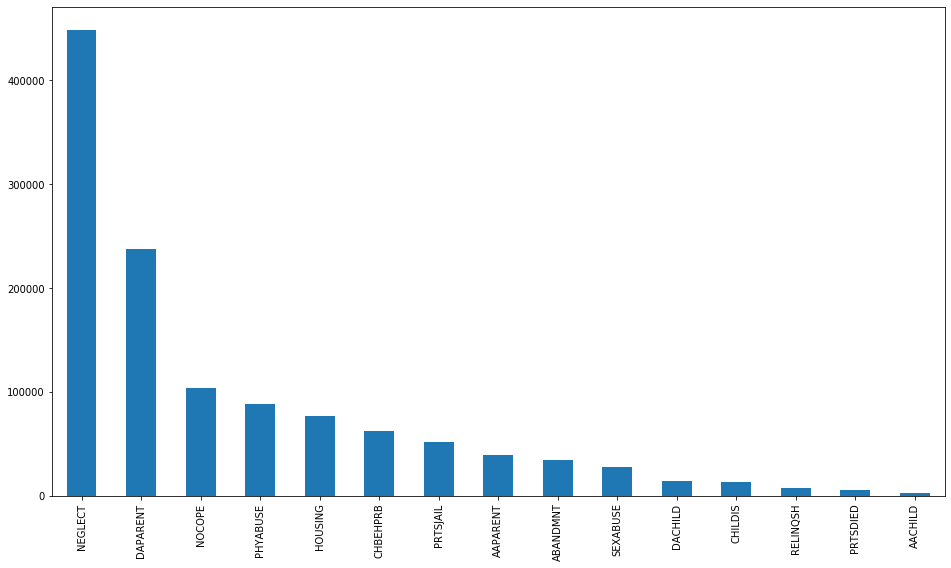

In [0]:
d.reason.value_counts().plot(kind='bar',figsize=(16,9))

## converting into Catagorical Data

In [16]:
d['reason'] = pa.Categorical(d['reason']).codes
for i,v in enumerate(sorted(predict)):
  print(str(i)+' : ',end=v+'\n')

0 : AACHILD
1 : AAPARENT
2 : ABANDMNT
3 : CHBEHPRB
4 : CHILDIS
5 : DACHILD
6 : DAPARENT
7 : HOUSING
8 : NEGLECT
9 : NOCOPE
10 : PHYABUSE
11 : PRTSDIED
12 : PRTSJAIL
13 : RELINQSH
14 : SEXABUSE


In [17]:
d.head()

index    FY  Version  STATE  St  ...  AgedOut  RaceEthn  Race  RU13  reason
1       1  2017        2      1   1  ...        0         7     1   1.0      10
8       8  2017        2      1   1  ...        0         2     2   1.0      10
31     31  2017        2      4   3  ...        0         1     1   2.0      10
58     58  2017        2      1   1  ...        0         1     1   3.0      10
59     59  2017        2      1   1  ...        0         1     1   1.0      10

[5 rows x 81 columns]

## Spliting dataset to Train and Test

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(d.drop('reason',axis=1), d['reason'], test_size = 0.3, random_state = 0)

## Balancing the Traing dataset

In [20]:
x = xTrain.copy()
x['reason'] = yTrain
x['reason'].value_counts().plot(kind='bar')

In [24]:
m = x['reason'].value_counts().min()
m

2042

In [0]:
ytrain = x[x['reason']==0].sample(n=m)

## Resampling the dataset

In [26]:
for i in range(1,15):
  t = x[x['reason']==i].sample(n=m)
  ytrain = pa.concat([ytrain,t])
# d.columns.tolist()
ytrain['reason'].value_counts().plot(kind='bar')

In [0]:
yTrain = ytrain['reason']
xTrain = ytrain.drop('reason',axis=1)
xTrain = xTrain.drop('index',axis=1)

## Selecting Model as Randome Forest

In [0]:
clf = RandomForestClassifier(random_state=0)

## Finding Best n_Estimators for Random Forest Model

In [0]:
 from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'n_estimators': [25, 30, 35, 40,45,50,55,60,65,70,75,80,85,90,95,100]}
grid_clf = GridSearchCV(clf, param_grid,cv=10)
grid_clf.fit(xTrain,yTrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [0]:
grid_clf.cv_results_

## Best Estimator

In [0]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Getting importent Features of the dataset for Random Forest Model

In [38]:
clf = RandomForestClassifier(n_estimators=100)
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(clf)
m = selection.fit(xTrain,yTrain)
# Reducing the xTrain.
xt = m.transform(xTrain)
pa.Series((xTrain.columns[m.get_support()]))

0           STATE
1              St
2        FIPSCode
3         CLINDIS
4         NUMPLEP
5        CURPLSET
6        CASEGOAL
7        CTKFAMST
8          CTK1YR
9        FOSFAMST
10       FCCTK1YR
11       HOFCCTK2
12       FCMntPay
13            DOB
14       PedRevDt
15         Rem1Dt
16       RemTrnDt
17       LatRemDt
18       CurSetDt
19        DoDFCDt
20       DoDTrnDt
21       TPRMomDt
22      LatRemLOS
23     SettingLOS
24        LifeLOS
25     AgeAtStart
26    AgeAtLatRem
27       AgeAtEnd
28       RaceEthn
29           RU13
dtype: object

## Training Model

In [0]:
# Training The model
training = clf.fit(xt,yTrain)

In [43]:
clf.score(xt,yTrain) * 100

96.9866144302971

In [44]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [0]:
xTest = xTest.drop('index',axis=1)
# Selecting imp. features from Test dataset
xtest = m.transform(xTest)

## Predicting Model

In [0]:
r = clf.predict(xtest)

In [49]:
accuracy_score(yTest,r) * 100

15.139687361802764

## Confusion Matrix

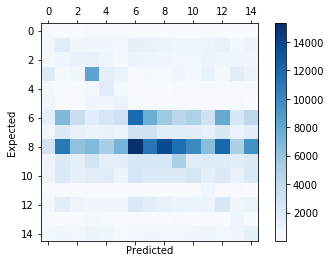

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(yTest,r), cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Overfiting Problem

We can clearly see that the model's preforemence with the training dataset is good but very poor with the test dataset. Which can mean that the dataset is not generalized to the data. 
To overcome this problem we can <br>
- We can perfome K-flod crossvalidation
- Increasing the size of the training data
- Reducing the features.<br>

We already reduced the features size of the dataset so we can perfome k-fold crossvalidation or Increase the training data we have generate some syntatic samples for the some reasons like `AACHILD` as we already used the entire data of that pirticular data sample.

## Trying XGboost

- Train Dataset Acc. Score : `28`
- Test Dataset Acc. Score : ` 16.66 `

In [0]:
from xgboost import XGBClassifier
xclf = XGBClassifier()

In [76]:
xclf.fit(xTrain.as_matrix(),yTrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Accuracy of the Model on Train Dataset

In [86]:
xclf.score(xTrain.as_matrix(),yTrain) * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


28.860594188703885

In [0]:
pdt = xclf.predict(xTest.values)

## Accuracy of the Model on Testing Dataset

In [85]:
accuracy_score(yTest,pdt) * 100

16.669917019856452

## Confuction Matrxi

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix(yTest,pdt), cmap=plt.cm.Blues)
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### --- END ---